# An analysis of sense resolution in multi-sense skip-gram models

## The resolution trade-off

A tavalyi ACL-en (Borbély et al 2016) egy olyan módszert javasoltunk többjelentésű embeddingek (MSE) felbontásának (,,szemcsésségének") mérésére, ami MSE-ből sima embeddingbe való lineáris fordításon (Mikolov et al 2013 Exploiting similarities...) alapszik. Hogy pontosan milyen módszert, arról a cikk beadása után is vitatkoztunk.

Azóta tovább mentem ebben a témában, méghozzá az volt az alapelvem, hogy az ott lazának nevezett mérték alapján állítom be a metaparamétereket (pl. hogy melyik célembeddinget használom). Ez a _laza_ mérték abban áll, hogy minél több jelentésvektornak legyen jó fordítása, mondjuk a legjobb 10-et nézve, de nem ettől laza, hanem hogy nem büntetjük az egybeeséseket. Ez van a lenti táblázat megfelelő oszlopában.

Annak a mérésére, hogy a különböző jelentésvektorok tényleg különböző jelentésnek felelnek-e meg, egy ennél csak kicsit szigorúbb mértéket vettem: a különböző jelentésvektorok jó (gold alapján) fordításainak _halmaza_ legyen különböző. Az ilyenek arányát a többjelentésűnek jósoltak körében mutatja a táblázatban a `disamb`.

Azt látjuk, hogy a két mérték között csereviszony van, amit úgy lehetne interpertálni, hogy minél specifikusabb egy vektor, annál könnyebb lefordítani (csak persze ha túl specifikus, akkor egybeeshetnek a fordítások).

||laza |disamb|
|:-|-|-|
|AdaGram|73.3%|18.53%|
|mutli “sense vectors”|71.0%|19.46%|
|mutli “context vectors”|69.9% |20.76%|

## Number of word senses plotted against frequency

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

from multisense_translate import MultiSenseLinearTranslator


Populating the interactive namespace from numpy and matplotlib


DEBUG:gensim.models.doc2vec:Fast version of gensim.models.doc2vec is being used
INFO:summa.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


In [61]:
def smooth_vals(vals, smooth_width):
    vals0 = np.copy(vals)
    for i in  range(0, smooth_width):
        vals0 += np.roll(vals, i)
    return vals0 / smooth_width

def sense_num_distri(mse_fn, smooth_width=100, head=-1, skip_top=0):
    sense_nums = []
    with open(mse_fn) as infile:
        _one, voc_len = (int(val) for val in infile.readline().strip().split())
        processed = 0
        for i, line in enumerate(infile):
            sense_num, word = line.strip().split()
            sense_num = int(sense_num)
            processed += sense_num
            if False:
                logging.debug('{:.4%} {} {}'.format(processed/voc_len, sense_num, word))
            try:
                sense_nums.append(sense_num)
            except:
                logging.warn(sense_num)
            #sense_nums = np.array(sense_nums)
    plt.plot(np.arange(len(sense_nums[skip_top:head]))+skip_top,
             smooth_vals(sense_nums[skip_top:head], smooth_width), linestyle='None', marker='.')            

Warning: az alábbi ábráknál, hogy mind alacsnyan indul, a simítás mellékhatása

### AdaGram (Bartumov et al 2015)

INFO:root:(50000, 'szintér', 1)


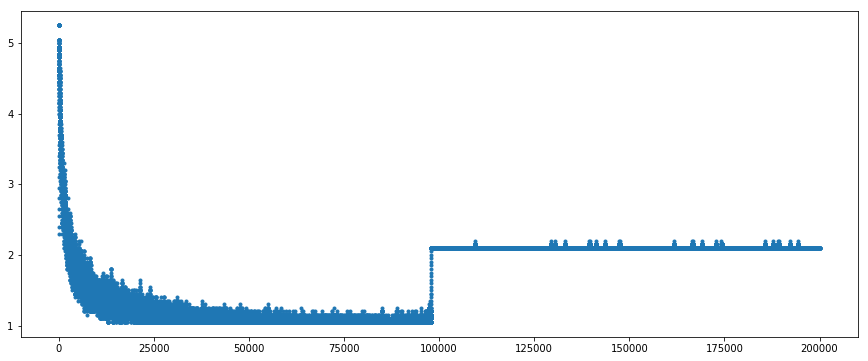

In [58]:
sense_num_distri(
    '/mnt/permanent/Language/Hungarian/Embed/multiprot/adagram/mnsz/glf/mnsz-glf-adagram-600.sense_num',
    smooth_width=20, head=200000)

The amibiguity jump is at frequency 90.

In [4]:
logging.info('')

INFO:root:


INFO:root:,*


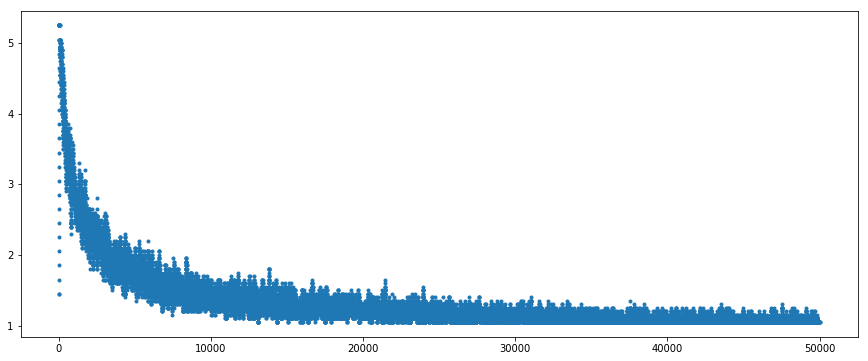

In [5]:
sense_num_distri(
    '/mnt/permanent/Language/Hungarian/Embed/multiprot/adagram/mnsz/glf/mnsz-glf-adagram-600.sense_num',
    smooth_width=20, head=50000)


### Mutli-sense skip-gram (Li and Jurafsky 2015)

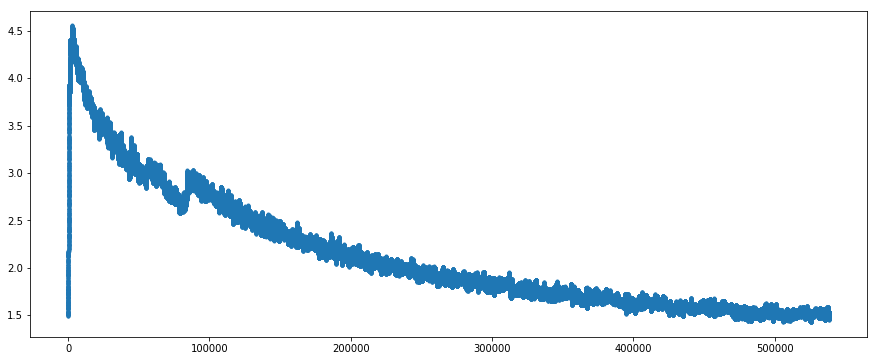

In [6]:
sense_num_distri(
    '/mnt/permanent/Language/Hungarian/Embed/multiprot/mutli_sense/mnsz/glf/mnsz-glf-mutli-joint-600_vect_sense.sense_num',
    smooth_width=500)

#### Most frequent words

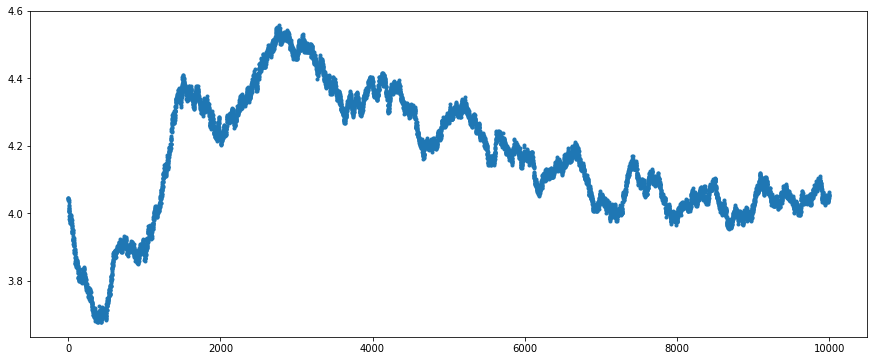

In [8]:
sense_num_distri(
    '/mnt/permanent/Language/Hungarian/Embed/multiprot/mutli_sense/mnsz/glf/mnsz-glf-mutli-joint-600_vect_sense.sense_num',
    smooth_width=500, head=10000)

#### Ambiguity jump

INFO:root:(50000, 'manöken', 3)


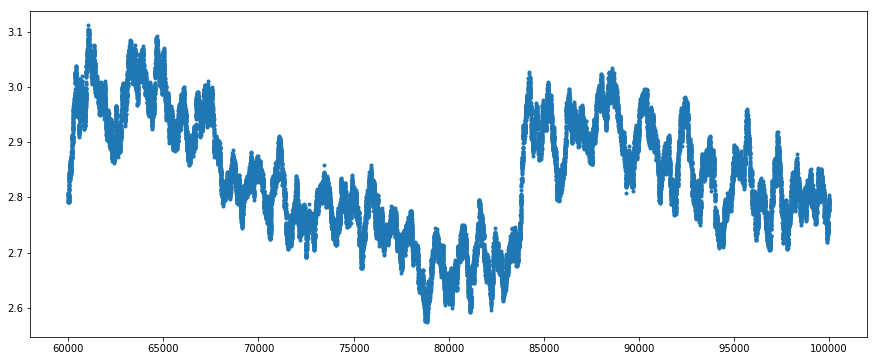

In [60]:
sense_num_distri(
    '/mnt/permanent/Language/Hungarian/Embed/multiprot/mutli_sense/mnsz/glf/mnsz-glf-mutli-joint-600_vect_sense.sense_num',
    smooth_width=500, head=100000, skip_top=60000)
